<a href="https://colab.research.google.com/github/MariemShn/Resampling-Datetime-Data/blob/main/Resampling_Datetime_Data(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resampling Datetime Data(Core)

* Student Name : Mariem Sahnoun

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/pub?output=csv'
df = pd.read_csv(url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


###1) Converting the date column to datetime dtype

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

###2) Setting the date column as the index

In [ ]:
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


###3) Filtering out the required data

In [ ]:
df = df.loc['2000':,['precipitation','mean_temp','min_temp','max_temp','snow_depth']]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   max_temp       7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


###4) Imputing missing values

In [ ]:
interpolated_df = df[["min_temp",	"max_temp","mean_temp"]].interpolate()
interpolated_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   min_temp   7671 non-null   float64
 1   max_temp   7671 non-null   float64
 2   mean_temp  7671 non-null   float64
dtypes: float64(3)
memory usage: 239.7 KB


In [ ]:
filled_df = df[["precipitation","snow_depth"]].fillna(0)
filled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7671 non-null   float64
 1   snow_depth     7671 non-null   float64
dtypes: float64(2)
memory usage: 179.8 KB


In [ ]:
combined_df = pd.concat([interpolated_df, filled_df], axis=1)
combined_df.info()
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   min_temp       7671 non-null   float64
 1   max_temp       7671 non-null   float64
 2   mean_temp      7671 non-null   float64
 3   precipitation  7671 non-null   float64
 4   snow_depth     7671 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


,min_temp,max_temp,mean_temp,precipitation,snow_depth
date,,,,,
2000-01-01,4.9,10.8,7.0,0.0,0.0
2000-01-02,5.0,11.5,7.9,0.2,0.0
2000-01-03,7.2,9.5,9.4,6.0,0.0
2000-01-04,4.4,11.0,7.0,0.2,0.0
2000-01-05,1.9,10.8,6.4,0.8,0.0


###Q1: What month had the most precipitation between 2000 through 2010?

In [ ]:
df_q1 = df["2000":"2010"].copy()
df_q1

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2010-12-27,5.0,0.2,-4.6,8.0,1.0
2010-12-28,0.4,5.3,2.5,9.5,0.0
2010-12-29,1.4,6.8,4.1,7.7,0.0


In [ ]:
month_prec = df_q1[['precipitation']]
month_prec = month_prec.resample('MS').sum()
month_prec.head()

,precipitation
date,
2000-01-01,14.3
2000-02-01,62.2
2000-03-01,13.4
2000-04-01,71.8
2000-05-01,68.4


In [ ]:
max_date = month_prec['precipitation'].idxmax()
print(f'The max precipitation date is: \n{max_date}')

The max precipitation date is: 
2009-11-01 00:00:00


In [ ]:
max_value = month_prec['precipitation'].max()
print(f'The corresponding value is: \n{max_value}')

The corresponding value is: 
138.4


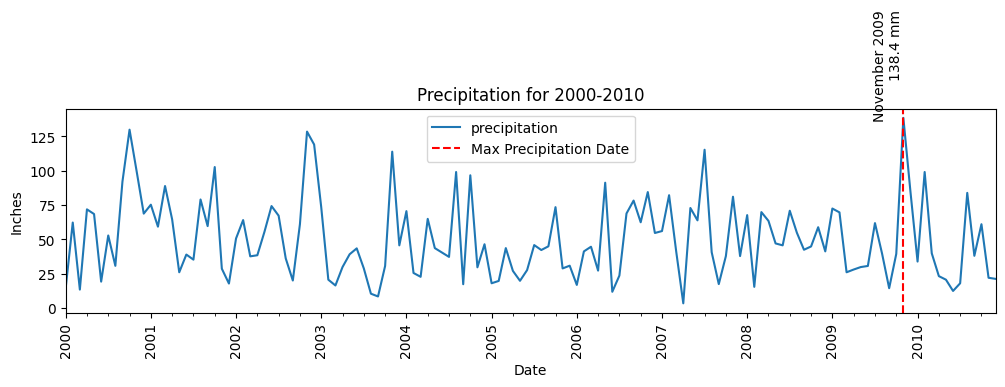

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))

month_prec.plot(ax = ax, title='Precipitation for 2000-2010')

ax.set_xlabel('Date')
ax.set_ylabel('Inches')

ax.axvline(x=max_date, color='r', linestyle='--', label='Max Precipitation Date')

ax.text(max_date, max_value, f'{max_date.strftime("%B %Y")}\n{max_value} mm', ha='right', rotation=90)

ax.legend()

fig.autofmt_xdate(rotation=90,ha='center')

###Q2: Which year between 2000-2020 had the coolest average temperature?

In [ ]:
df_q2 = df["2000":"2020"].copy()
df_q2

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [ ]:
month_temp = df_q2[['mean_temp']]
month_temp = month_temp.resample('A').mean()
month_temp.head()

,mean_temp
date,
2000-12-31,11.532070
2001-12-31,11.313006
2002-12-31,12.006286
2003-12-31,12.232764
2004-12-31,11.872046


In [ ]:
min_temp_date = month_temp['mean_temp'].idxmin()
print(f'The lowest mean temperature date is: \n{min_temp_date}')

The lowest mean temperature date is: 
2010-12-31 00:00:00


In [ ]:
min_temp_value = round(month_temp['mean_temp'].min(),2)
print(f'The lowest mean temperature value is: \n{min_temp_value}')

The lowest mean temperature value is: 
10.65


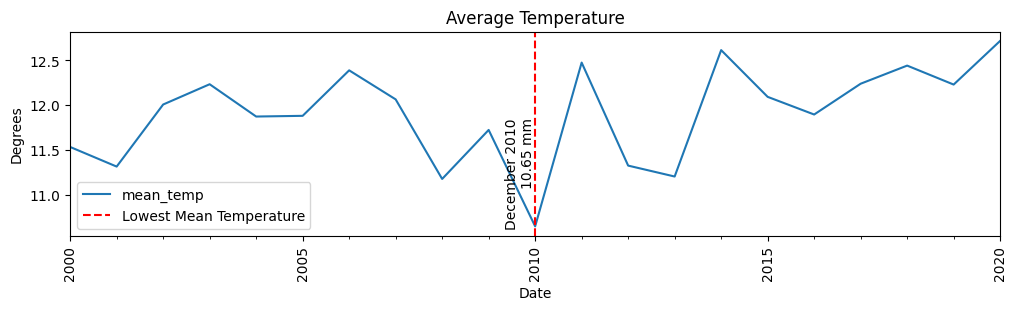

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))

month_temp.plot(ax = ax, title='Average Temperature')

ax.set_xlabel('Date')
ax.set_ylabel('Degrees')

ax.axvline(min_temp_date, color='r', linestyle='--', label='Lowest Mean Temperature')

ax.text(min_temp_date, min_temp_value, f'{min_temp_date.strftime("%B %Y")}\n{min_temp_value} mm', ha='right', rotation=90)

ax.legend()

fig.autofmt_xdate(rotation=90,ha='center')